In [8]:
from __future__ import division
import sys
import pandas as pd
import numpy as np
import scipy
from numpy import mean, std, cov
from numpy.random import seed, randn
import matplotlib.pyplot as plt
from matplotlib import pyplot
from math import sqrt
from scipy.stats import t, pearsonr, sem
import seaborn as sns
from statistics import mean, stdev
import seaborn as sns

In [9]:
#import excel file containing data summary

wtpdata = pd.read_csv(r'old_wtp_data.csv', encoding='utf-8-sig')
#wtpdata = pd.read_excel(r'wtp_taskdata_NEW.xlsx')
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(wtpdata)

                  participant  avg_spent_social  avg_spent_nonsocial  \
0    549ea92efdf99b4ffa5fa208          0.032000             0.030333   
1    55a43687fdf99b7da1908e0f          0.018889             0.018261   
2    55ea70c37480920010aa9982          0.031000             0.029250   
3    566c9284d408ea000519c6d7          0.018889             0.017826   
4    56f745653bd969000d170c15          0.033333             0.028929   
5    57e972d7c3e5930001447bb1          0.030000             0.028235   
6    58ab75c4ef58a9000119d16c          0.023684             0.022667   
7    5c510d1310223b00012fa23e          0.028684             0.025000   
8    5cb33d40f173240019513957          0.022593             0.020000   
9    5cc166b25899270017dd60e2          0.032174             0.028889   
10   5cfecc1e96681500168a1799          0.038696             0.036667   
11   5d305152b2cfe00019231a2a          0.029231             0.025833   
12   5da23c68cf775d001724d361          0.016957             0.01

In [9]:
socialavg = wtpdata.avg_spent_social
#calculate group mean for av spent on social experiences
social_M = mean(socialavg)
print('group mean: %.12f'% (social_M))
print('standard error of the mean: %.12f'% (sem(socialavg)))

group mean: 0.029477955109
standard error of the mean: 0.000581378027


In [10]:
nonsocialavg = wtpdata.avg_spent_nonsocial
#calculate group mean for av spent on non-social experiences
nonsocial_M = mean(nonsocialavg)
print('group mean: %.12f'% (nonsocial_M))
print('standard error of the mean: %.12f'% (sem(nonsocialavg)))

group mean: 0.027207715624
standard error of the mean: 0.000523720790


In [11]:
#sample size
n = len(wtpdata)
print(n)

101


In [12]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(socialavg[i]-nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([socialavg[i]-nonsocialavg[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

0.0015136415865342982 0.229294188
0.0031513312539649513


In [13]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)


# calculate the t statistic
t_stat = (social_M - nonsocial_M) / sed
print(t_stat)


# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

0.0003135691796366207
7.239995613661329
100


In [14]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=7.240, df=100, cv=1.660, p=0.000
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


In [15]:
wtp_long= pd.read_csv(r'/Users/mruiz/Desktop/notebooks/old_wtp_data_LONG.csv')
print(wtp_long)

                  participant  sum_spent        S_NS  avg_spent      prop  AQ  \
0    549ea92efdf99b4ffa5fa208       0.64      Social   0.032000  0.400000  26   
1    55a43687fdf99b7da1908e0f       0.51      Social   0.018889  0.540000  16   
2    55ea70c37480920010aa9982       0.31      Social   0.031000  0.200000  17   
3    566c9284d408ea000519c6d7       0.51      Social   0.018889  0.540000   5   
4    56f745653bd969000d170c15       0.70      Social   0.033333  0.428571  32   
5    57e972d7c3e5930001447bb1       0.99      Social   0.030000  0.660000  23   
6    58ab75c4ef58a9000119d16c       0.45      Social   0.023684  0.387755  20   
7    5c510d1310223b00012fa23e       1.09      Social   0.028684  0.760000  22   
8    5cb33d40f173240019513957       0.61      Social   0.022593  0.540000  20   
9    5cc166b25899270017dd60e2       0.74      Social   0.032174  0.460000  19   
10   5cfecc1e96681500168a1799       0.89      Social   0.038696  0.460000  23   
11   5d305152b2cfe00019231a2

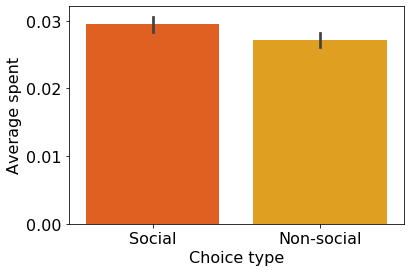

In [16]:
#wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'average_spent': [social_M, nonsocial_M]})

#wtp_plot = sns.barplot(x="experience_type", y="average_spent", data=wtp_means)
wtp_plot = sns.barplot(x="S_NS", y="avg_spent", data=wtp_long, palette= "autumn")
#plt3.set_title('DMN-VS Connectivity: Friend Reciprocate - Friend Defect',fontsize = 16)
wtp_plot.set_xlabel('Choice type',fontsize=16)
wtp_plot.set_ylabel('Average spent',fontsize=16)
wtp_plot.tick_params(labelsize=16)

wtp_plot.figure.savefig('old_choicetype_avgspent.svg')

In [17]:
#calculate effect size- cohens d

cohens_d = (mean(socialavg) - mean(nonsocialavg)) / (sqrt((stdev(socialavg) ** 2 + stdev(nonsocialavg) ** 2) / 2))

print(cohens_d)

0.40827197741673504


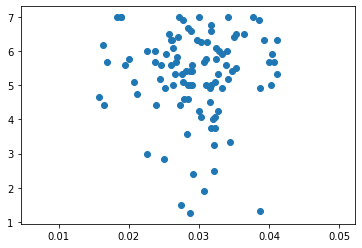

[[ 3.41380414e-05 -1.74470646e-04]
 [-1.74470646e-04  1.68120822e+00]]
Pearsons correlation: -0.023
p value: 0.8192
Accept null hypothesis that the means are equal.


In [18]:
prop_social = wtpdata['prop_social']
aq = wtpdata.AQ #autism quotient
mspss = wtpdata.MSPSS #perceived social support


#avg amount spent on social / mulitdimensional scale of perceived social support
pyplot.scatter(socialavg, mspss)
pyplot.show()
covariance = cov(socialavg, mspss)
print(covariance)
corr, _ = pearsonr(socialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


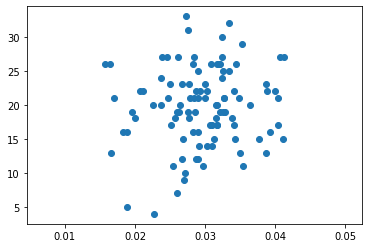

[[3.41380414e-05 3.68272652e-03]
 [3.68272652e-03 3.29176238e+01]]
Pearsons correlation: 0.110
p value: 0.2741
Accept null hypothesis that the means are equal.


In [19]:
#avg amount spent on social / aq
pyplot.scatter(socialavg, aq)
pyplot.show()
covariance = cov(socialavg, aq)
print(covariance)
corr, _ = pearsonr(socialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

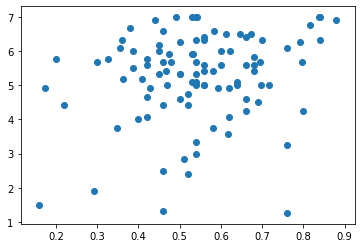

[[0.0221414  0.0401066 ]
 [0.0401066  1.68120822]]
Pearsons correlation: 0.208
p value: 0.0370
Reject the null hypothesis that the means are equal.


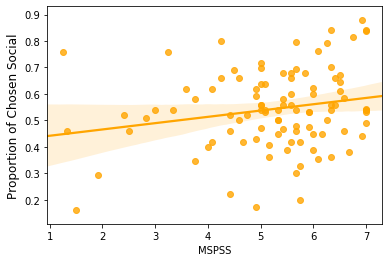

In [105]:
##### prop of chosen social // self report #####
#prop of chosen social // MSPSS
pyplot.scatter(prop_social, mspss)
pyplot.show()
covariance = cov(prop_social, mspss)
print(covariance)
corr, _ = pearsonr(prop_social, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
prop_mspss= sns.regplot(x="MSPSS", y="prop_social", data=wtpdata,color="orange");
prop_mspss.set_ylabel('Proportion of Chosen Social',fontsize=12)
prop_mspss.figure.savefig('old_prop_mspss_scatter.svg')

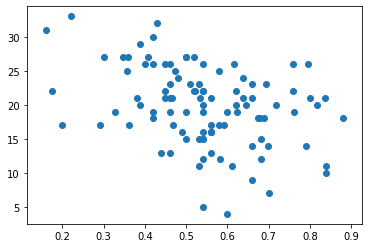

[[ 2.21413965e-02 -3.14753379e-01]
 [-3.14753379e-01  3.29176238e+01]]
Pearsons correlation: -0.369
p value: 0.0001
Reject the null hypothesis that the means are equal.


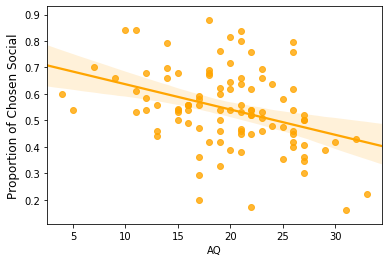

In [107]:
# prop social // aq
pyplot.scatter(prop_social, aq)
pyplot.show()
covariance = cov(prop_social, aq)
print(covariance)
corr, _ = pearsonr(prop_social, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, aq)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
prop_aq=sns.regplot(x="AQ", y="prop_social", data=wtpdata,color="orange");
prop_aq.set_ylabel('Proportion of Chosen Social',fontsize=12)
prop_aq.figure.savefig('old_prop_aq_scatter.svg')

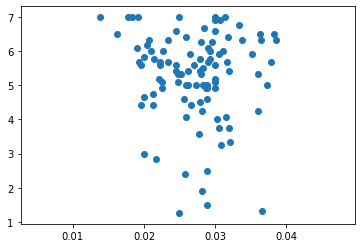

[[ 2.77026301e-05 -6.00026485e-04]
 [-6.00026485e-04  1.68120822e+00]]
Pearsons correlation: -0.088
p value: 0.3820
Accept null hypothesis that the means are equal.


In [22]:
##### avg spent on nonsocial // self report #####
# nonsocial // mspss (social support)
pyplot.scatter(nonsocialavg, mspss)
pyplot.show()
covariance = cov(nonsocialavg, mspss)
print(covariance)
corr, _ = pearsonr(nonsocialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

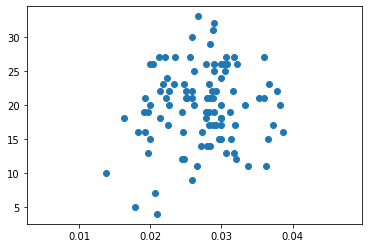

[[2.77026301e-05 3.46242869e-03]
 [3.46242869e-03 3.29176238e+01]]
Pearsons correlation: 0.115
p value: 0.2536
Accept null hypothesis that the means are equal.


In [23]:
# nonsocial // aq
pyplot.scatter(nonsocialavg, aq)
pyplot.show()
covariance = cov(nonsocialavg, aq)
print(covariance)
corr, _ = pearsonr(nonsocialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [24]:
prop_socialavg= wtpdata.prop_social
#calculate group mean for prop of chosen social experiences
prop_soc_M = mean(prop_socialavg)
print('mean: %.12f'% (prop_soc_M))

mean: 0.543336043743


In [25]:
prop_nonsocialavg= wtpdata.prop_nonsocial
#calculate group mean for prop of chosen social experiences
prop_nonsoc_M = mean(prop_nonsocialavg)
print('mean: %.12f'% (prop_nonsoc_M))

mean: 0.456663956257


In [26]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(prop_socialavg[i]-prop_nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([prop_socialavg[i]-prop_nonsocialavg[i] for i in range(n)])
print(d1,d2)

9.615275723412376 8.753880836000002


In [27]:
# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

0.2975997076235126


In [28]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.02961227768810143


In [29]:
# calculate the t statistic
t_stat = (prop_soc_M - prop_nonsoc_M) / sed
print(t_stat)

# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

2.9268970255528313
100


In [30]:
#calculate cohens d
cohens_d = (mean(prop_socialavg) - mean(prop_nonsocialavg)) / (sqrt((stdev(prop_socialavg) ** 2 + stdev(prop_nonsocialavg) ** 2) / 2))

# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f, d=%.3f' % (t_stat, df, cv, p,cohens_d))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')


t=2.927, df=100, cv=1.660, p=0.004, d=0.582
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


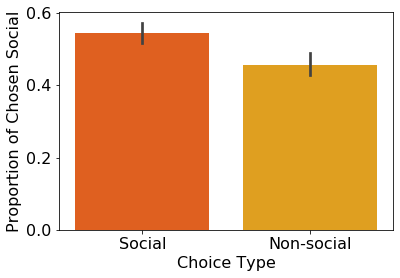

In [31]:
#wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'prop_chosen': [prop_soc_M, prop_nonsoc_M]})


#from long format dataframe ---old_wtp_data_LONG.csv ---imported above
wtp_plot = sns.barplot(x="S_NS", y="prop", data=wtp_long,palette="autumn")

#plt3.set_title('DMN-VS Connectivity: Friend Reciprocate - Friend Defect',fontsize = 16)
wtp_plot.set_xlabel('Choice Type',fontsize=12)
wtp_plot.set_ylabel('Proportion of Chosen Social',fontsize=12)
wtp_plot.tick_params(labelsize=11)
plt3.set_title('DMN-VS Connectivity: Friend Reciprocate - Friend Defect',fontsize = 16)
wtp_plot.figure.savefig('old_choicetype_propsocial.svg')

In [32]:
###################################
#### t stats for sums #####

In [33]:
social_sum= wtpdata.total_spent_social
#calculate group mean for prop of chosen social experiences
social_sum_M = mean(social_sum)
print('mean: %.12f'% (social_sum_M))


mean: 0.780792079208


In [34]:
nonsocial_sum= wtpdata.total_spent_nonsocial
#calculate group mean for prop of chosen social experiences
nonsocial_sum_M = mean(nonsocial_sum)
print('mean: %.12f'% (nonsocial_sum_M))

mean: 0.607128712871


In [35]:
# sum squared difference between observations
d1 = sum([(social_sum[i]-nonsocial_sum[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([social_sum[i]-nonsocial_sum[i] for i in range(n)])
print(d1,d2)

20.505199999999988 17.540000000000003


In [36]:
# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

0.4178414119550075


In [37]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.04157677445050852


In [38]:
# calculate the t statistic
t_stat = (social_sum_M - nonsocial_sum_M) / sed
print(t_stat)

4.17693216060703


In [39]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

100


In [40]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')


t=4.177, df=100, cv=1.660, p=0.000
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


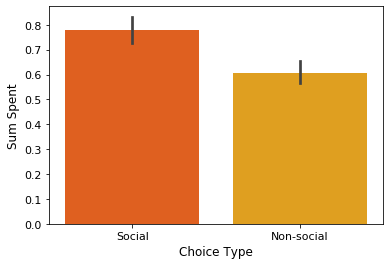

In [119]:
#from long format dataframe ---old_wtp_data_LONG.csv ---imported above
wtp_plot = sns.barplot(x="S_NS", y="sum_spent", data=wtp_long,palette= "autumn")

#plt3.set_title('DMN-VS Connectivity: Friend Reciprocate - Friend Defect',fontsize = 16)
wtp_plot.set_xlabel('Choice Type',fontsize=12)
wtp_plot.set_ylabel('Sum Spent',fontsize=12)
wtp_plot.tick_params(labelsize=11)
wtp_plot.figure.savefig('old_choicetype_sumspent.svg')

In [42]:
#### sum // self-report ####


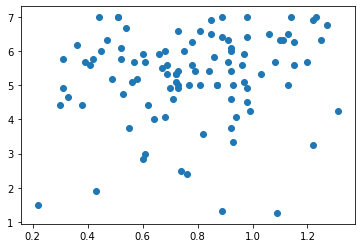

[[0.06604137 0.0496115 ]
 [0.0496115  1.68120822]]
Pearsons correlation: 0.149
p value: 0.1373
Accept null hypothesis that the means are equal.


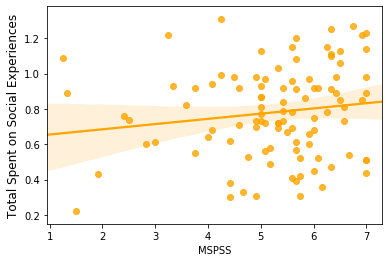

In [108]:
#sum of social / mulitdimensional scale of perceived social support
pyplot.scatter(social_sum, mspss)
pyplot.show()
covariance = cov(social_sum, mspss)
print(covariance)
corr, _ = pearsonr(social_sum, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

sum_mspss = sns.regplot(x="MSPSS", y="total_spent_social", data=wtpdata,color="orange");
sum_mspss.set_ylabel('Total Spent on Social Experiences',fontsize=12)
sum_mspss.figure.savefig('old_sum_mspss_scatter.svg')


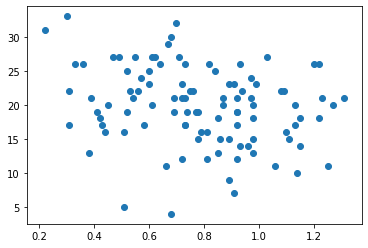

[[ 0.06604137 -0.35821782]
 [-0.35821782 32.91762376]]
Pearsons correlation: -0.243
p value: 0.0144
Reject the null hypothesis that the means are equal.


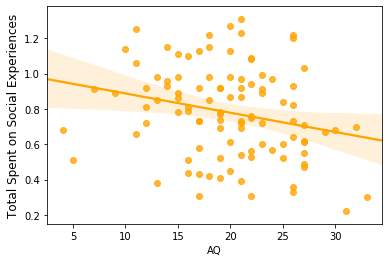

In [109]:
#sum of social / aq
pyplot.scatter(social_sum, aq)
pyplot.show()
covariance = cov(social_sum, aq)
print(covariance)
corr, _ = pearsonr(social_sum, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_aq= sns.regplot(x="AQ", y="total_spent_social", data=wtpdata,color="orange");
sum_aq.set_ylabel('Total Spent on Social Experiences',fontsize=12)
sum_aq.figure.savefig('old_sum_aq_scatter.svg')

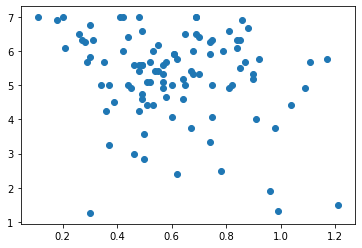

[[ 0.05303867 -0.06988732]
 [-0.06988732  1.68120822]]
Pearsons correlation: -0.234
p value: 0.0185
Reject the null hypothesis that the means are equal.


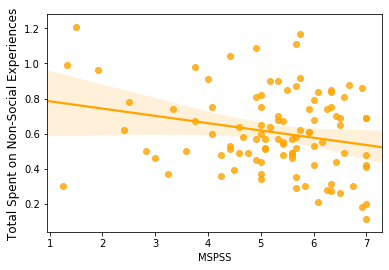

In [122]:
#sum of nonsocial / mulitdimensional scale of perceived social support
pyplot.scatter(nonsocial_sum, mspss)
pyplot.show()
covariance = cov(nonsocial_sum, mspss)
print(covariance)
corr, _ = pearsonr(nonsocial_sum, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
ns_sum_mspss= sns.regplot(x="MSPSS", y="total_spent_nonsocial", data=wtpdata,color="orange");
ns_sum_mspss.set_ylabel('Total Spent on Non-Social Experiences',fontsize=12)
ns_sum_mspss.figure.savefig('old_ns_sum_mspss_scatter.svg')

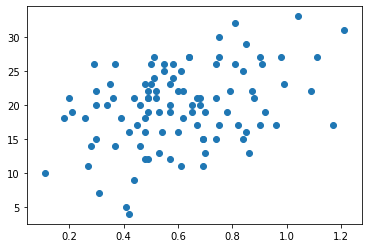

[[ 0.05303867  0.4762396 ]
 [ 0.4762396  32.91762376]]
Pearsons correlation: 0.360
p value: 0.0002
Reject the null hypothesis that the means are equal.


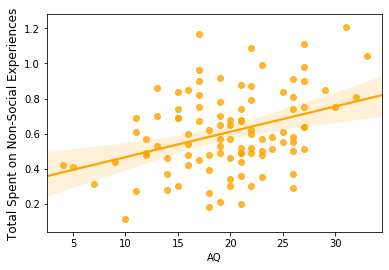

In [121]:
#sum of nonsocial  / aq
pyplot.scatter(nonsocial_sum, aq)
pyplot.show()
covariance = cov(nonsocial_sum, aq)
print(covariance)
corr, _ = pearsonr(nonsocial_sum, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
ns_sum_aq=sns.regplot(x="AQ", y="total_spent_nonsocial", data=wtpdata,color="orange");
ns_sum_aq.set_ylabel('Total Spent on Non-Social Experiences',fontsize=12)
ns_sum_aq.figure.savefig('old_ns_sum_aq_scatter.svg')

In [40]:
#import excel file containing data summary

wtpdata = pd.read_csv(r'/Users/dfareri/Dropbox/Dominic/Github/fareri-lab/WTP_CardTask/data/old_wtp_data_pilot1.csv', encoding='utf-8-sig')
#wtpdata = pd.read_excel(r'wtp_taskdata_NEW.xlsx')
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(wtpdata)

FileNotFoundError: [Errno 2] File b'/Users/dfareri/Dropbox/Dominic/Github/fareri-lab/WTP_CardTask/data/old_wtp_data_pilot1.csv' does not exist: b'/Users/dfareri/Dropbox/Dominic/Github/fareri-lab/WTP_CardTask/data/old_wtp_data_pilot1.csv'

In [41]:
#sample size
n_pilot1 = len(wtpdata)
print(n_pilot1)

# degrees of freedom
df = n_pilot1 - 1
print(df)
alpha= 0.05

101
100


In [10]:
prop_socialavg_pilot1= wtpdata.prop_social
prop_nonsocialavg_pilot1= wtpdata.prop_nonsocial
#calculate group mean for prop of chosen social experiences
prop_soc_M_pilot1 = mean(prop_socialavg_pilot1)
print('mean: %.12f'% (prop_soc_M_pilot1))


#calculate group mean for prop of chosen social experiences
prop_nonsoc_M_pilot1 = mean(prop_nonsocialavg_pilot1)
print('mean: %.12f'% (prop_nonsoc_M_pilot1))

#Calculate STD
# sum squared difference between observations
d1 = sum([(prop_socialavg_pilot1[i]-prop_nonsocialavg_pilot1[i])**2 for i in range(n_pilot1)])
# sum difference between observations
d2 = sum([prop_socialavg_pilot1[i]-prop_nonsocialavg_pilot1[i] for i in range(n_pilot1)])
print(d1,d2)


# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n_pilot1)) / (n_pilot1 - 1))
print(standev)


#calculate standard error of the difference between the means
sed = standev / np.sqrt(n_pilot1)
print(sed)

mean: 0.526219992058
mean: 0.473780007942
5.400339712761417 3.618358904
0.2768146818326052
0.033324571619083955


In [13]:
# calculate the t statistic
t_stat = (prop_soc_M_pilot1 - prop_nonsoc_M_pilot1) / sed
print(t_stat)

# degrees of freedom
df = n_pilot1 - 1
print(df)
alpha= 0.05

# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

    
#calculate effect size- cohens d
cohens_d = (mean(prop_socialavg_pilot1) - mean(prop_nonsocialavg_pilot1)) / (sqrt((stdev(prop_socialavg_pilot1) ** 2 + stdev(prop_nonsocialavg_pilot1) ** 2) / 2))

print(cohens_d)

1.5736131499410246
68
t=1.574, df=68, cv=1.668, p=0.120
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.
0.3788815229652694


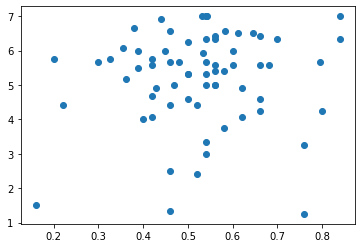

[[0.01915659 0.01670932]
 [0.01670932 1.85765961]]
Pearsons correlation: 0.089
p value: 0.4692
Accept null hypothesis that the means are equal.


In [17]:
##### prop of chosen social // self report #####
#prop of chosen social // MSPSS
pyplot.scatter(prop_socialavg_pilot1, wtpdata.MSPSS)
pyplot.show()
covariance = cov(prop_socialavg_pilot1, wtpdata.MSPSS)
print(covariance)
corr, _ = pearsonr(prop_socialavg_pilot1, wtpdata.MSPSS)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_socialavg_pilot1, wtpdata.MSPSS)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [39]:
##### prop of chosen social // self report #####
#prop of chosen social // AQ
pyplot.scatter(prop_socialavg_pilot1, wtpdata.AQ)
pyplot.show()
covariance = cov(prop_socialavg_pilot1, wtpdata.AQ)
print(covariance)
corr, _ = pearsonr(prop_socialavg_pilot1, wtpdata.AQ)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_socialavg_pilot1, wtpdata.AQ)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sns.regplot(x="AQ", y="prop_social", data=wtpdata);


NameError: name 'prop_socialavg_pilot1' is not defined